In [1]:
import pandas as pd
import numpy as np

In [2]:
import statsmodels.api as sm
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_excel(r"C:\Users\Asus\Desktop\DDP\Clean2d_master_dataset.xlsx")

In [5]:
data.head()

,Time (s),Material,Alpha,Part,Node,X,Y,Z,Temperature,T_left,T_right,T_bottom,T_top,x/L,y/L,z/L,Tdiff_0.0005 (s)
0,0.01,Copper,0.000111,PART-1-1,1,0.000,0.0,0,300.0,300,100,300,100,0.0,0.0,0,1.25
1,0.01,Copper,0.000111,PART-1-1,9,0.004,0.0,0,300.0,300,100,300,100,0.2,0.0,0,1.25
2,0.01,Copper,0.000111,PART-1-1,17,0.008,0.0,0,300.0,300,100,300,100,0.4,0.0,0,1.25
3,0.01,Copper,0.000111,PART-1-1,25,0.012,0.0,0,300.0,300,100,300,100,0.6,0.0,0,1.25
4,0.01,Copper,0.000111,PART-1-1,33,0.016,0.0,0,300.0,300,100,300,100,0.8,0.0,0,1.25


In [6]:
data.describe()

,Time (s),Alpha,Node,X,Y,Z,Temperature,T_left,T_right,T_bottom,T_top,x/L,y/L,z/L,Tdiff_0.0005 (s)
count,38016.000000,38016.000000,38016.000000,38016.000000,38016.000000,38016.0,3.801600e+04,38016.000000,38016.000000,38016.000000,38016.000000,38016.00000,38016.00000,38016.0,19008.000000
mean,1.289773,0.000050,431.000000,0.010000,0.005000,0.0,1.780572e+02,450.000000,100.000000,350.000000,50.000000,0.50000,0.50000,0.0,1.585000
std,3.347419,0.000041,280.420045,0.006831,0.003416,0.0,1.546827e+02,111.804869,81.650732,50.000658,50.000658,0.34157,0.34157,0.0,0.335009
min,0.010000,0.000004,1.000000,0.000000,0.000000,0.0,-2.887560e-33,300.000000,0.000000,300.000000,0.000000,0.00000,0.00000,0.0,1.250000
25%,0.050000,0.000018,187.000000,0.004000,0.002000,0.0,4.525520e+01,375.000000,0.000000,300.000000,0.000000,0.20000,0.20000,0.0,1.250000
50%,0.150000,0.000044,431.000000,0.010000,0.005000,0.0,1.227250e+02,450.000000,100.000000,350.000000,50.000000,0.50000,0.50000,0.0,1.585000
75%,1.000000,0.000076,675.000000,0.016000,0.008000,0.0,3.000000e+02,525.000000,200.000000,400.000000,100.000000,0.80000,0.80000,0.0,1.920000
max,20.000000,0.000111,861.000000,0.020000,0.010000,0.0,6.000000e+02,600.000000,200.000000,400.000000,100.000000,1.00000,1.00000,0.0,1.920000


In [10]:
import time
#storing starting time
begin = time.time()

#seperating independent and dependent variables, Temperature is the only dependent variable in our case
x = data[['T_left', 'T_right','T_bottom', 'T_top', 'Time (s)', 'x/L', 'y/L','Alpha']]
y = data['Temperature']
x.shape, y.shape 

((38016, 8), (38016,))

In [11]:
#Creating Training-Testing data from the new data frame

from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x, y , test_size = 0.25, random_state = 100)

In [12]:
#Importing Linear Regression and metric mean absolute error

from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

In [13]:
lr = LR()
# Fitting the model
lr.fit(train_x, train_y)

print(lr.intercept_) #Intercept of the Multiple Linear Regression

303.6833755519048


In [14]:
#storing end time
time.sleep(1)
end = time.time()

#Calculating runtime
print ("Total runtime of Linear Regression program (in seconds) is", end - begin)

Total runtime of Linear Regression program (in seconds) is 2.2309844493865967


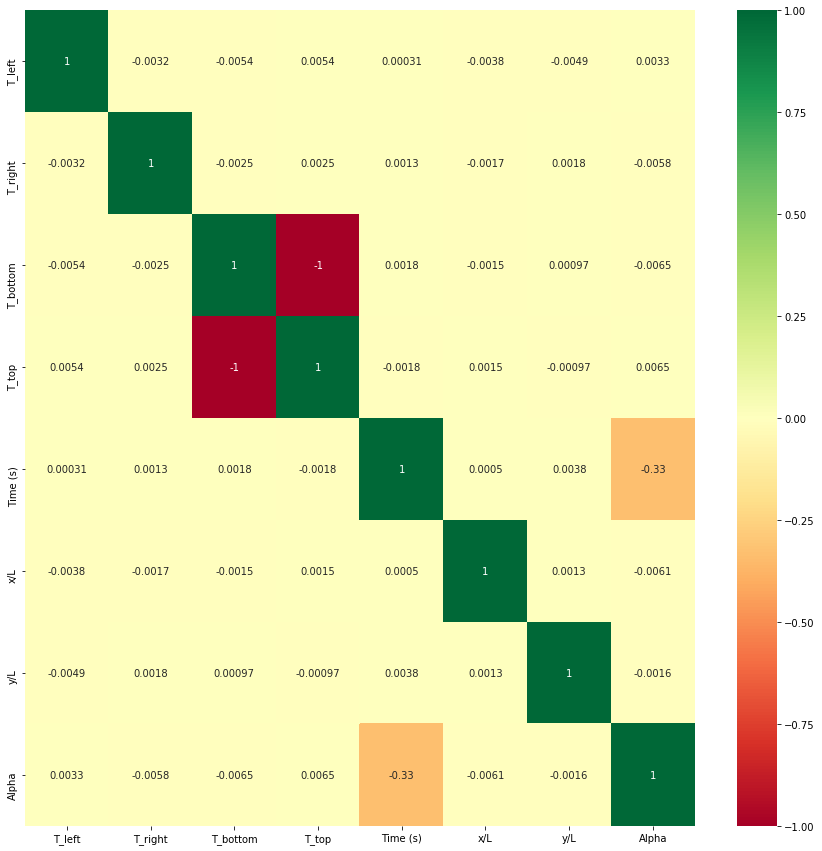

In [15]:
plt.figure(figsize = (15, 15))
sns.heatmap(train_x.corr(), annot = True, cmap="RdYlGn", vmin = -1, vmax = 1)
plt.show()   

In [16]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
k = mae(train_predict, train_y)
print('Training Mean Absolute Error', k )

Training Mean Absolute Error 85.53069685939165


In [17]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = mae(test_predict, test_y)
print('Test Mean Absolute Error    ', k )

Test Mean Absolute Error     83.48081914188836


In [19]:
#Regression Coefficients of the variables in order 
Coeff_data = {'Variables': ['T_left', 'T_right', 'T_bottom', 'T_top', 'Time (s)', 'x/L', 'y/L', 'Alpha'], 'Coefficient': lr.coef_}
df = pd.DataFrame(Coeff_data, columns = ['Variables', 'Coefficient'])

print(df)

  Variables    Coefficient
0    T_left       0.137578
1   T_right       0.157611
2  T_bottom      -0.013467
3     T_top       0.013467
4  Time (s)       4.675102
5       x/L    -215.174172
6       y/L    -223.036744
7     Alpha  275372.449570


Text(0.5, 1.0, 'Coefficient plot')

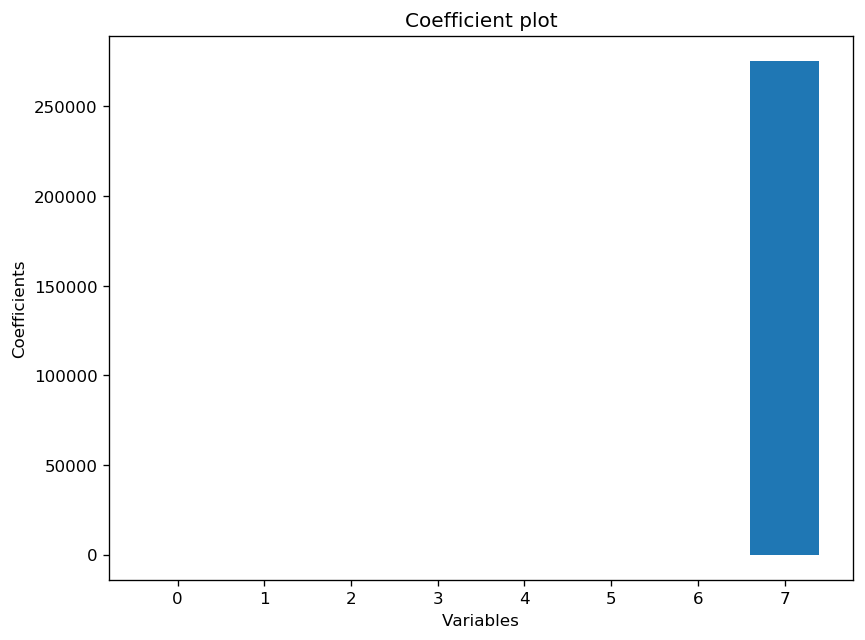

In [20]:
#Unscaled Coefficient vs Variable plot
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

In [21]:
lr.score(train_x, train_y)*100

49.269012785796136

In [22]:
lr.score(test_x,test_y)*100

48.89495589103898

In [23]:
y_pred = lr.predict(test_x)
print (y_pred)

[154.1923479  144.72078927 142.60311272 ... 194.75633582 -42.4823442
 123.01551111]


In [24]:
df=pd.DataFrame({'Actual':test_y, 'Predicted':y_pred})
df

,Actual,Predicted
5771,1.000000e+02,154.192348
27401,-8.259910e-35,144.720789
22628,2.732510e+01,142.603113
12451,1.000000e+02,166.985024
13111,8.743740e+01,286.096164
...,...,...
35221,2.681660e+02,333.322171
13384,9.986740e+01,25.413664
9154,1.324940e+02,194.756336
16235,-8.480660e-42,-42.482344


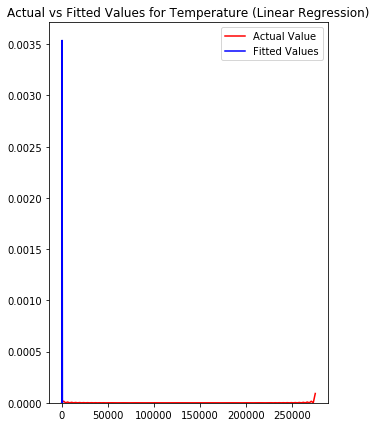

In [25]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Temperature (Linear Regression)')


plt.show()
plt.close()

## Scaling the Variables

In [27]:
from sklearn.preprocessing import StandardScaler

In [29]:
data['scaled_T_left']   = StandardScaler().fit_transform(data[['T_left']])
data['scaled_T_right']  = StandardScaler().fit_transform(data[['T_right']])
data['scaled_T_bottom'] = StandardScaler().fit_transform(data[['T_bottom']])
data['scaled_T_top']    = StandardScaler().fit_transform(data[['T_top']])
data['scaled_time']     = StandardScaler().fit_transform(data[['Time (s)']])
data['scaled_location_x'] = StandardScaler().fit_transform(data[['x/L']])
data['scaled_location_y'] = StandardScaler().fit_transform(data[['y/L']])
data['scaled_alpha']    = StandardScaler().fit_transform(data[['Alpha']])
data

,Time (s),Material,Alpha,Part,Node,X,Y,Z,Temperature,T_left,...,z/L,Tdiff_0.0005 (s),scaled_T_left,scaled_T_right,scaled_T_bottom,scaled_T_top,scaled_time,scaled_location_x,scaled_location_y,scaled_alpha
0,0.01,Copper,0.000111,PART-1-1,1,0.000,0.00,0,3.000000e+02,300,...,0,1.25,-1.341641,0.000000,-1.0,1.0,-0.382321,-1.46385,-1.46385,1.469745
1,0.01,Copper,0.000111,PART-1-1,9,0.004,0.00,0,3.000000e+02,300,...,0,1.25,-1.341641,0.000000,-1.0,1.0,-0.382321,-0.87831,-1.46385,1.469745
2,0.01,Copper,0.000111,PART-1-1,17,0.008,0.00,0,3.000000e+02,300,...,0,1.25,-1.341641,0.000000,-1.0,1.0,-0.382321,-0.29277,-1.46385,1.469745
3,0.01,Copper,0.000111,PART-1-1,25,0.012,0.00,0,3.000000e+02,300,...,0,1.25,-1.341641,0.000000,-1.0,1.0,-0.382321,0.29277,-1.46385,1.469745
4,0.01,Copper,0.000111,PART-1-1,33,0.016,0.00,0,3.000000e+02,300,...,0,1.25,-1.341641,0.000000,-1.0,1.0,-0.382321,0.87831,-1.46385,1.469745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38011,20.00,Steel 310,0.000004,PART-1-1,829,0.004,0.01,0,3.127410e-34,600,...,0,NaN,1.341641,-1.224745,1.0,-1.0,5.589522,-0.87831,1.46385,-1.135726
38012,20.00,Steel 310,0.000004,PART-1-1,837,0.008,0.01,0,1.775720e-34,600,...,0,NaN,1.341641,-1.224745,1.0,-1.0,5.589522,-0.29277,1.46385,-1.135726
38013,20.00,Steel 310,0.000004,PART-1-1,845,0.012,0.01,0,1.301770e-34,600,...,0,NaN,1.341641,-1.224745,1.0,-1.0,5.589522,0.29277,1.46385,-1.135726
38014,20.00,Steel 310,0.000004,PART-1-1,853,0.016,0.01,0,7.662100e-35,600,...,0,NaN,1.341641,-1.224745,1.0,-1.0,5.589522,0.87831,1.46385,-1.135726


In [31]:
#seperating independent and dependent variables, Temperature is the only dependent variable in our case
x = data[['scaled_T_left', 'scaled_T_right', 'scaled_T_bottom', 'scaled_T_top', 'scaled_time', 'scaled_location_x', 'scaled_location_y', 'scaled_alpha']]
y = data['Temperature']
x.shape, y.shape

((38016, 8), (38016,))

In [34]:

# example of normalizing input and output variables for regression.
from numpy import mean
from numpy import absolute
from numpy import loadtxt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import TransformedTargetRegressor
# load data
#dataset = loadtxt('housing.csv', delimiter=",")
# split into inputs and outputs
#X, y = dataset[:, :-1], dataset[:, -1]
x = data[['scaled_T_left', 'scaled_T_right','scaled_T_bottom', 'scaled_T_top', 'scaled_time', 'scaled_location_x', 'scaled_location_y', 'scaled_alpha']]
y = data['Temperature']
# prepare the model with input scaling
pipeline = Pipeline(steps=[('normalize', StandardScaler()), ('model', LR())])
# prepare the model with target scaling
model = TransformedTargetRegressor(regressor=pipeline, transformer=StandardScaler())
# evaluate model
cv = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# convert scores to positive
scores = absolute(scores)
# summarize the result
s_mean = mean(scores)
print('Mean MAE: %.3f' % (s_mean))

Mean MAE: 84.922


In [35]:
import time
#storing starting time
begin = time.time()

#Creating Training-Testing data from the new data frame

from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x, y , test_size = 0.25, random_state = 100)

In [36]:
#Importing Linear Regression and metric mean absolute error

from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

In [37]:
# Creating instance of Linear Regresssion
lr = LR()

# Fitting the model
lr.fit(train_x, train_y)

print(lr.intercept_) #Intercept of the Multiple Linear Regression

178.11400524500147


In [38]:
#storing end time
time.sleep(1)
end = time.time()

#Calculating runtime
print ("Total runtime of Random Forest program (in seconds) is", end - begin)

Total runtime of Random Forest program (in seconds) is 5.188650369644165


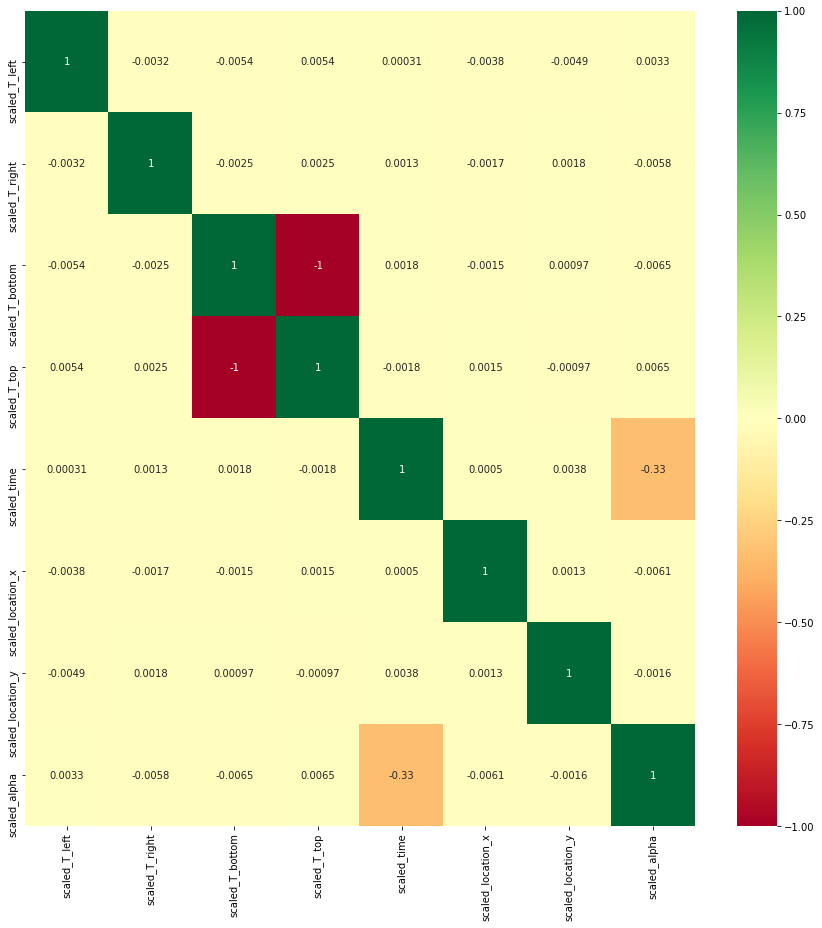

In [39]:
plt.figure(figsize = (15, 15))
sns.heatmap(train_x.corr(), annot = True, cmap="RdYlGn", vmin = -1, vmax = 1)
plt.show() 

In [40]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
k = mae(train_predict, train_y)
print('Training Mean Absolute Error', k )

Training Mean Absolute Error 85.53069685939157


In [41]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = mae(test_predict, test_y)
print('Test Mean Absolute Error    ', k )

Test Mean Absolute Error     83.48081914188829


In [42]:
lr.coef_

array([ 15.38165362,  12.86888876,  -0.67334219,   0.67334219,
        15.64932187, -73.49597161, -76.18155126,  11.35640278])

In [44]:
#Regression Coefficients of the variables in order 
Coeff_data = {'Variables': ['scaled_T_left', 'scaled_T_right', 'scaled_T_bottom', 'scaled_T_top', 'scaled_time', 'scaled_location_x', 'scaled_location_y', 'scaled_Alpha'], 'Coefficient': lr.coef_}
df = pd.DataFrame(Coeff_data, columns = ['Variables', 'Coefficient'])

print(df)

           Variables  Coefficient
0      scaled_T_left    15.381654
1     scaled_T_right    12.868889
2    scaled_T_bottom    -0.673342
3       scaled_T_top     0.673342
4        scaled_time    15.649322
5  scaled_location_x   -73.495972
6  scaled_location_y   -76.181551
7       scaled_Alpha    11.356403


Text(0.5, 1.0, 'Coefficient plot')

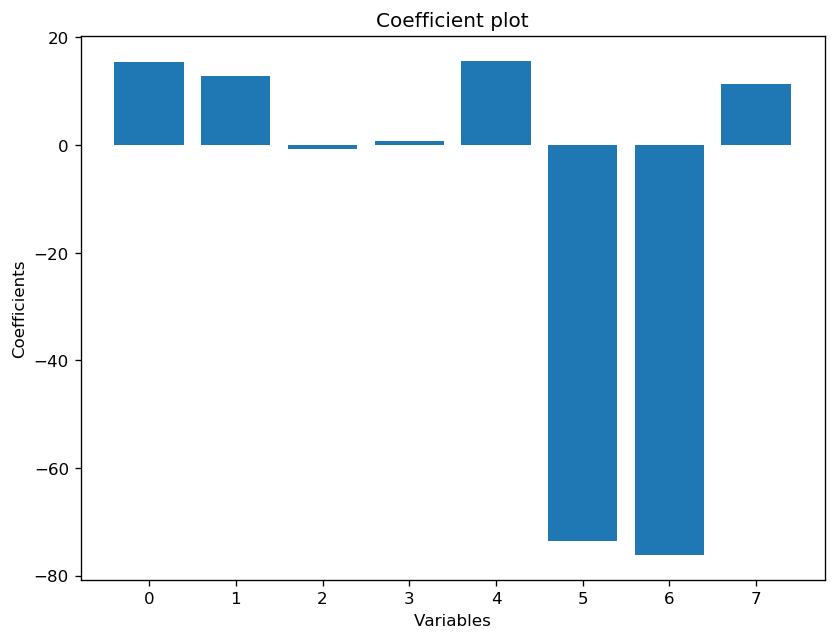

In [45]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

In [46]:
lr.score(train_x, train_y)*100

49.269012785796136

In [47]:
lr.score(test_x,test_y)*100

48.894955891039

In [48]:
y_pred = lr.predict(test_x)
print (y_pred)

[154.1923479  144.72078927 142.60311272 ... 194.75633582 -42.4823442
 123.01551111]


In [49]:
df=pd.DataFrame({'Actual':test_y, 'Predicted':y_pred})
df

,Actual,Predicted
5771,1.000000e+02,154.192348
27401,-8.259910e-35,144.720789
22628,2.732510e+01,142.603113
12451,1.000000e+02,166.985024
13111,8.743740e+01,286.096164
...,...,...
35221,2.681660e+02,333.322171
13384,9.986740e+01,25.413664
9154,1.324940e+02,194.756336
16235,-8.480660e-42,-42.482344


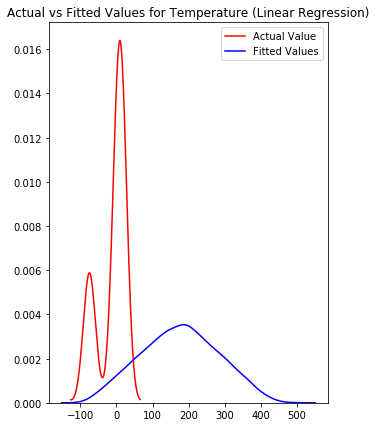

In [50]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Temperature (Linear Regression)')


plt.show()
plt.close()

## Using Analytical Solution to create features

In [51]:
#Taking Negative Natural Logarithm values of Diffusion Coefficient
#data['negLog_DC'] = np.log(data['Diffusion Coeff'])*(-1)

data['exp t1'] = np.exp((-10)* data['Time (s)'])

data['exp t2'] = np.exp((-40)* data['Time (s)'])

data['exp t3'] = np.exp((-90)* data['Time (s)'])

data['sq_x/L'] = np.square(data['x/L'])

data['sq_y/L'] = np.square(data['y/L'])

data['Tl-Tr'] = data['T_left'] - data['T_right']
data['Tb-Tt'] = data['T_bottom'] - data['T_top']

data['Tl+Tr'] = data['T_left'] + data['T_right']
data['Tb+Tt'] = data['T_bottom'] + data['T_top']

data['(sq_x/L)-x/L'] = data['sq_x/L'] - data['x/L']
data['(sq_y/L)-y/L'] = data['sq_y/L'] - data['y/L']

data['deltaT_x/L'] = data['Tl-Tr'] * data['x/L']

data['Timespacex1'] = data['(sq_x/L)-x/L'] * data['Tl+Tr'] * data['exp t1'] 
data['Timespacey1'] = data['(sq_y/L)-y/L'] * data['Tb+Tt'] * data['exp t1'] 

data['Timespacex2'] = data['(sq_x/L)-x/L'] * data['Tl-Tr'] * data['exp t2']
data['Timespacey2'] = data['(sq_y/L)-y/L'] * data['Tb-Tt'] * data['exp t2'] 

data['Timespacex3'] = data['(sq_x/L)-x/L'] * data['Tl+Tr'] * data['exp t3']
data['Timespacey3'] = data['(sq_y/L)-y/L'] * data['Tb+Tt'] * data['exp t3'] 
#data['DCParameter'] = (data['Diffusion Coeff'] * data['Time(s)'] * data['Tl-Tr']) / (data['sq_x/L'])


In [52]:
data.tail()

,Time (s),Material,Alpha,Part,Node,X,Y,Z,Temperature,T_left,...,Tb+Tt,(sq_x/L)-x/L,(sq_y/L)-y/L,deltaT_x/L,Timespacex1,Timespacey1,Timespacex2,Timespacey2,Timespacex3,Timespacey3
38011,20.0,Steel 310,0.000004,PART-1-1,829,0.004,0.01,0,3.127410e-34,600,...,400,-0.16,0.0,120.0,-1.328541e-85,0.0,-0.0,0.0,-0.0,0.0
38012,20.0,Steel 310,0.000004,PART-1-1,837,0.008,0.01,0,1.775720e-34,600,...,400,-0.24,0.0,240.0,-1.992811e-85,0.0,-0.0,0.0,-0.0,0.0
38013,20.0,Steel 310,0.000004,PART-1-1,845,0.012,0.01,0,1.301770e-34,600,...,400,-0.24,0.0,360.0,-1.992811e-85,0.0,-0.0,0.0,-0.0,0.0
38014,20.0,Steel 310,0.000004,PART-1-1,853,0.016,0.01,0,7.662100e-35,600,...,400,-0.16,0.0,480.0,-1.328541e-85,0.0,-0.0,0.0,-0.0,0.0
38015,20.0,Steel 310,0.000004,PART-1-1,861,0.020,0.01,0,-5.605190e-44,600,...,400,0.00,0.0,600.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0


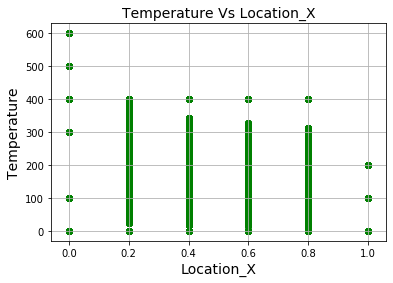

In [53]:
plt.scatter(data['x/L'], data['Temperature'], color='green')
plt.title('Temperature Vs Location_X', fontsize=14)
plt.xlabel('Location_X', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
plt.grid(True)
plt.show()

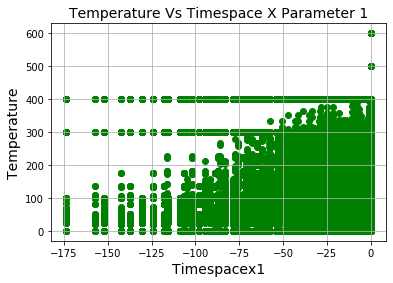

In [54]:
plt.scatter(data['Timespacex1'], data['Temperature'], color='green')
plt.title('Temperature Vs Timespace X Parameter 1', fontsize=14)
plt.xlabel('Timespacex1', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
plt.grid(True)
plt.show()

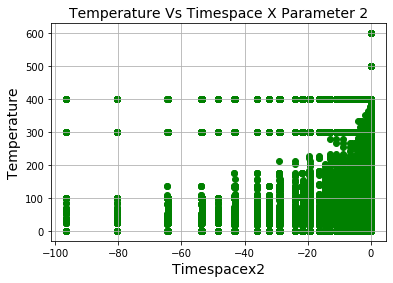

In [55]:
plt.scatter(data['Timespacex2'], data['Temperature'], color='green')
plt.title('Temperature Vs Timespace X Parameter 2', fontsize=14)
plt.xlabel('Timespacex2', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
plt.grid(True)
plt.show()

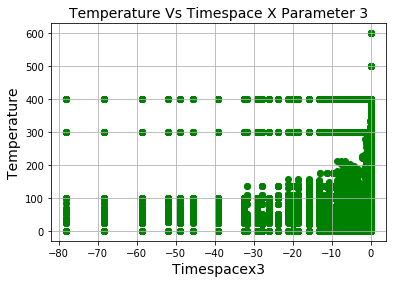

In [56]:
plt.scatter(data['Timespacex3'], data['Temperature'], color='green')
plt.title('Temperature Vs Timespace X Parameter 3', fontsize=14)
plt.xlabel('Timespacex3', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
plt.grid(True)
plt.show()

In [57]:
#seperating independent and dependent variables, Temperature is the only dependent variable in our case
x = data.loc[:, ['T_left', 'T_bottom', 'Alpha','Timespacex1', 'Timespacey1', 'Timespacex2', 'Timespacey2', 'Timespacex3', 'Timespacey3']]
y = data['Temperature']
x.shape, y.shape

((38016, 9), (38016,))